# Quandl Examples
Getting data from Quandl API.

This notebook extracts data from the Quandl API and dispays it in a graph.

In [18]:
import datetime

from findatapy.util.loggermanager import LoggerManager
from chartpy import Chart, Style
from findatapy.market import Market, MarketDataGenerator, MarketDataRequest

This is a wrapper for logging errors/output.

In [19]:
logger = LoggerManager().getLogger(__name__)

Set the engine to output the chart. The possible engines currently is only matplotlib

In [20]:
chart = Chart(engine='matplotlib')

In [21]:
market = Market(market_data_generator=MarketDataGenerator())

MarketDataRequest is requesting data from a source.

Data Scource: Quandl, ONS, boe, dukascopy,fxcm,alfred, yahoo, google, fred, oecd, eurostat, edgar-index, bitcoincharts, poloniex, binance, bitfinex, gdax, kraken,bitmex, alphavantage,huobi or a .csv

Tickers: (can be list) eg. EURUSD
cache_algo (eg. internet, disk, memory) - internet will forcibly download from the internet
Quandl API Key: insert API key from Quandl. Make sure you verify your email!

In [22]:
run_example = 0

###### fetch data from Quandl for BoE rate (using Bloomberg data)
if run_example == 1 or run_example == 0:
    # Monthly average of UK resident monetary financial institutions' (excl. Central Bank) sterling
    # Weighted average interest rate, other loans, new advances, on a fixed rate to private non-financial corporations (in percent)
    # not seasonally adjusted
    md_request = MarketDataRequest(
        start_date="01 Jan 2005",  # start date
        data_source='quandl',  # use Quandl as data source
        tickers=['Weighted interest rate'],
        fields=['close'],  # which fields to download
        vendor_tickers=['BOE/CFMBJ84'],  # ticker (Bloomberg)
        vendor_fields=['close'],  # which Bloomberg fields to download
        cache_algo='internet_load_return',
        quandl_api_key='mchs47VHfnWzxv6mGhxA')  # how to return data

In [23]:
    df = market.fetch_market(md_request)

2019-11-02 16:11:20,240 - findatapy.market.datavendorweb - INFO - Request Quandl data
2019-11-02 16:11:21,092 - findatapy.market.datavendorweb - INFO - Completed request from Quandl for ['Weighted interest rate.close']
2019-11-02 16:11:23,201 - findatapy.market.ioengine - WARNING - Couldn't push MarketDataRequest_419__abstract_curve_key-None__category-None__category_key-backtest_default-cat_quandl_daily_NYC__cut-NYC__data_source-quandl__environment-backtest__expiry_date-NaT__fields-close__finish_date-2019-11-02 14:21:50_116819__freq-daily__freq_mult-1__gran_freq-None__resample-None__resample_how-last__start_date-2005-01-01 00:00:00__tickers-Weighted interest rate__trade_side-trade__vendor_fields-close__vendor_tickers-BOE_CFMBJ84 to Redis: Error 10061 connecting to 127.0.0.1:6379. No connection could be made because the target machine actively refused it.


Set style for graph, axis labels and plot

Creates an object with essentially the same characteristics as a matplotlib graph.

In [ ]:
style = Style()

In [25]:
Setting styles above.

SyntaxError: invalid syntax (<ipython-input-25-81e8e8912071>, line 1)

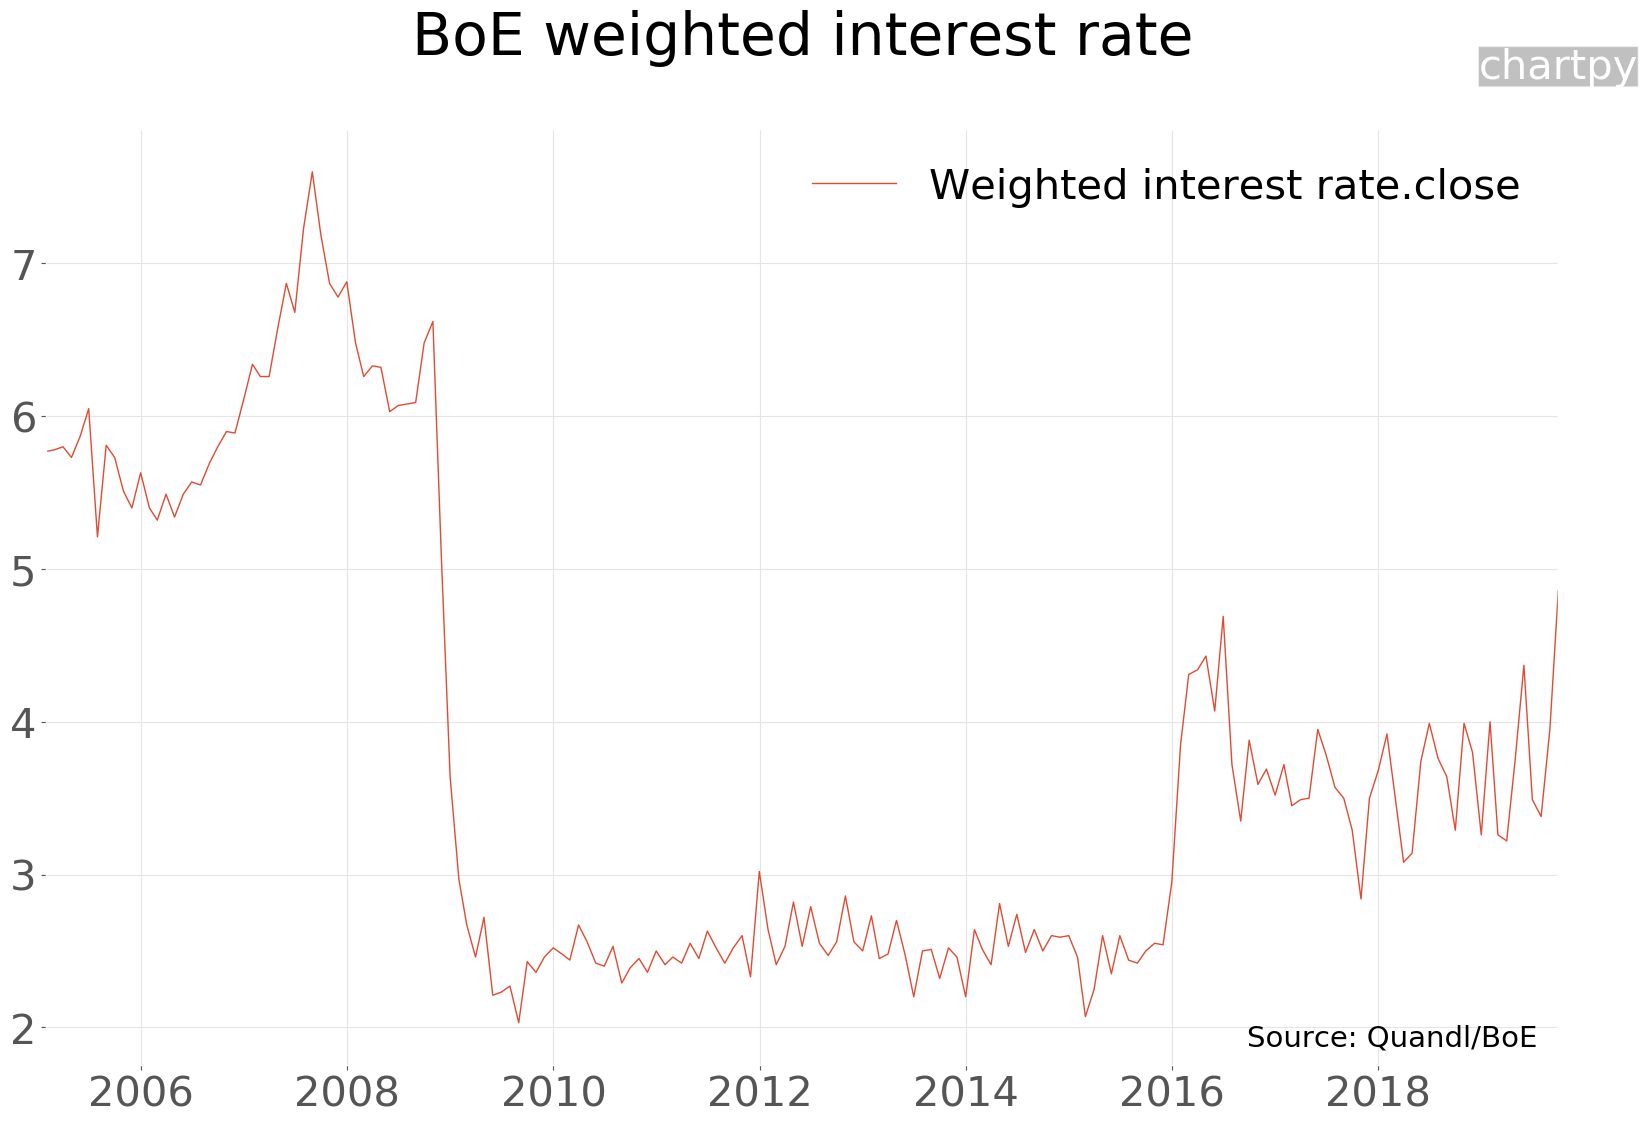

In [24]:
style.title = 'BoE weighted interest rate'
style.scale_factor = 3
style.file_output = "boe-rate.png"
style.source = 'Quandl/BoE'

chart.plot(df, style=style)